# Lecture 17 - Gaussian Mixture Models

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Gaussian Mixture Models

A **Gaussian Mixture Model** or **GMM** is a probabilistic model that assumes a data likelihood to be a weighted sum of Gaussian distributions with unknown parameters.

$$p(\mathbf{x}|\Theta) = \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$$

where $\Theta=\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$, $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^K \pi_k = 1$.

* When standard distributions (such as Gamma, Exponential, Gaussian, etc.) are not sufficient to characterize a *complicated* data likelihood, we can instead characterize it as the sum of weighted Gaussians distributions

* Another way that GMMs are most commonly used for is to partition data in subgroups

## Data Likelihood as a Gaussian Mixture Model

* GMMs can be used to learn a complex distribution that represent a dataset. Thus, it can be used within the probabilistic generative classifier framework to model complex data likelihoods.

* GMMs are also commonly used for **clustering**. Here a GMM is fit to a dataset with the goal of partitioning it into clusters.

**<font color=blue>Step 1</font>**

Describe the **observed data likelihood**, $\mathcal{L}^o$. As seen last class:

$$\mathcal{L}^0 = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)$$

**<font color=blue>Step 2</font>**

Describe the log-likelihood function:

\begin{align}
\mathcal{L} &= \ln\left(\prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)\right)\\
\iff \mathcal{L} &= \sum_{i=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) \right)
\end{align}

**<font color=blue>Step 3</font>**

Optimize for the parameters $\Theta=\{\pi_k, \mu_k,\Sigma_k\}_{k=1}^K$

$$\frac{\partial \mathcal{L}}{\partial \mu_k} = 0, \frac{\partial \mathcal{L}}{\partial \Sigma_k} = 0, \text{ and }, \frac{\partial \mathcal{L}}{\partial \pi_k} = 0$$

but this is a difficult problem to maximize!

* A common approach for estimating the parameters of a GMM given a data set is by using the **Expectation-Maximization (EM) algorithm**.

### Applications of (Gaussian) Mixture Models

* **Data Representation and Inference**. Represent *any* data set using a complex distribution. You may want to describe your data with a distribution but the data does not fit into a standard form (e.g. Gamma, Gaussian, Exponential, etc.), then you can use a (Gaussian) Mixture Model to describe the data. Having a representation of your data in a distribution form is a very powerful tool that, other than having a model of the data, allows you infer about new samples, make predictions, etc.
    * Having a parametric form for a real world model, allows us to apply it in simulation and use it for designing/optimizing decision-making solutions.

* **Clustering.** Partition the data into groups. Note that in the GMMs formulation we did not add the concept of labels/targets. So GMMs are an **unsupervised learning** model. It represents the data with a very complex likelihood and then we can decompose that likelihood to partition the data into categories. This is also known as **clustering**.
    * Commonly used in financial institutions to learn different group of individuals with specific characteristics of interest.

# Expectation-Maximization (EM) algorithm

## Hidden Latent Variables

The **Expectation-Maximization** or **EM** algorithm is used to find the Maximum Likelihood Estimators (MLE) (or MAP estimators) for model parameters when data is incomplete, has missing data points, or has unobserved (hidden) latent variables (such as the case of censored data). 

* For all of these cases, the MLE optimization is very difficult to obtain by simply taking the derivative and solve for the parameters.

**<font color=orange>Step 1</font>**
The first step of EM is to characterized the observed likelihood $\mathcal{L}^0$.

**<font color=orange>Step 2</font>**
Introduce *hidden latent variables* (also referred to as *hidden variables*) that simplify the observed data likelihood, $\mathcal{L}$.

**<font color=orange>Step 3</font>**
Use the hidden variables to define the *complete likelihood* $\mathcal{L}^c$.

With this, we build the EM optimization function:

$$\arg_{z,\Theta} \max Q(\Theta,\Theta^t)$$

where 

$$Q(\Theta,\Theta^t) = E[\ln(\mathcal{L^c})|X,\Theta^t]$$

$E[\bullet]$ denotes expected value and $t$ denotes *iteration*. At $t=0$, we start with random values for the parameters $\Theta$.

Once we have this, the EM algorithm will alternate between E-step and M-step:

1. **<font color=blue>E-step</font> (Expectation step)** Estimate the hidden variables. While holding $\Theta$ fixed, find the variables $z$ that maximize $E[\ln(\mathcal{L^c})]$.

2. **<font color=blue>M-step</font> (Maximization step)** Estimate the parameters of the complete data likelihood $\mathcal{L}^c$. While holding the newly found variables $z$, find the best values for the parameters $\Theta$ that maximize $E[\ln(\mathcal{L^c})]$.

and it keeps iterating between E-step and M-step until convergence or until a certain number of iterations is reached.

* EM is an **alternating optimization** algorithm, as it alternates between E-step and M-step in order to find the hidden variables and best set of parameters, respectively.
    * In the first step ($t=0$), EM will start with a random guess for the value of the parameters $\Theta$ in order to perform the E-step.
    * What is the problem with alternating optimization algorithms in general?

* EM is a general algorithm that can be applied to a variety of problems (not just the examples we are learning today). 

* EM is heavily tied with Maximum Likelihood Estimation (MLE). It is commonly used to simplify difficult MLE problems.
    * It was originally introduced by Dempster, Laird, and Rubin in 1977 in a paper called "Maximum Likelihood from Incomplete Data via the EM Algorithm".

## Optimizing GMM with the EM Algorithm

The observed data likelihood for a Gaussian Mixture Model (GMM) is

$$\mathcal{L}^0 = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)$$

**What hidden variables can we add to simplify this problem?**

* In this example, a hidden variable can be the label of the Gaussian from which $x_i$ was drawn from.

$$z_i: \text{label of the Gaussian from which $x_i$ was drawn from}$$

If we know $z_i$, then for each data point we know which Gaussian it was drawn from along with its respective parameter $\mu_{z_i}$ and $\Sigma_{z_i}$ and its respective weight $\pi_{z_i}$. So, each data point would had been drawn from $\pi_{z_i}N(x_i|\mu_{z_i}, \Sigma_{z_i})$. 

Then, assuming we have $\{z_i\}_{i=1}^N$, we can write the complete data likelihood:

$$\mathcal{L}^c = \prod_{i=1}^N \pi_{z_i}\mathcal{N}(x_i|\mathbf{\mu}_{z_i},\Sigma_{z_i})$$

Now we can iterate between the **E-step** and **M-step** of the EM algorithm until we find convergence or we have reached a threshold for a number of iterations.

# Optimization Function

We can now extent the optimization function:

\begin{align}
Q(\Theta,\Theta^t) &= E[\ln(\mathcal{L^c})|X,\Theta^t] \\
&= \sum_{\mathbf{z}} \ln(\mathcal{L^c}) P(z|X,\Theta^t) \\
&= \sum_{z_i=1}^K \ln(\mathcal{L^c}) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)
\end{align}

**<font color=blue>E-step</font>**

In order to complete the E-STEP, we need to know how to compute $P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$. 

* This is the posterior probability of the label $z_i$ for data sample $x_i$.

* So we want to assign the label $z_i$ to the data sample $x_i$ for which the posterior probability is maximized (just like in Naive Bayes classification).

Recall from **Bayes' Rule**: for two non-empty events $A$ and $B$, $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$. We can use this theorem to rewrite $P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$:

\begin{align}
P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t) &= \frac{P(\mathbf{x}_i|\mathbf{z}_i,\Theta^t)P(\mathbf{z}_i|\Theta^t)}{P(\mathbf{x}_i|\Theta^t)} \\
&= \frac{P(\mathbf{x}_i|\mathbf{\mu}_{z_i}^t, \Sigma_{z_i}^t) \pi_{z_i}^t}{\sum_{z_i=1}^K \pi_{z_i}^t P(\mathbf{x}_i|\mathbf{\mu}_{z_i}^t, \Sigma_{z_i}^t)} \\
&= C_{ik}
\end{align}

This is called the **memberships** or **responsabilities** matrix, which contains the label assignment for point $x_i$ in each Gaussian component $k.

* In the E-STEP we estimate the membership matrix $C_{ik} = P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)$. This matrix is of size $N\times K$ that contains the likelihoods of each point belonging in each one of the Gaussians.

* A good check when implementing this matrix is to make sure that the sum of the rows are equal to 1!

**This completes the Expectation step (E-step) in EM**. Now, we derive the update equations for the parameters $\Theta=\{\pi_k,\mu_k,\Sigma_k\}_{k=1}^K$  in the Maximization step.

**<font color=blue>M-step</font>**

In the **M-step**, we are going to use (and hold constant) the membership matrix $C_{ik}$ we learned from the E-step.

We will know estimate the new set of parameters $\Theta=\{\pi_k,\mu_k,\Sigma_k\}_{k=1}^K$ that maximize $Q(\Theta,\Theta^t)$, i.e.

$$\arg_{\mathbf{\Theta}}\max Q(\Theta,\Theta^t)$$

Without loss of generality, let's assume that the covariance matrices are isotropic: $\Sigma_k = \sigma_k^2\mathbf{I}$, then we can rewrite it as:

\begin{align}
Q(\Theta, \Theta^t) &= \sum_{z_i=1}^K \ln(\mathcal{L^c}) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t)\\
&= \sum_{z_i=1}^K \ln\left(\prod_{i=1}^N \pi_{z_i}\mathcal{N}(x_i|\mathbf{\mu}_{z_i},\Sigma_{z_i})\right) P(\mathbf{z}_i|\mathbf{x}_i,\Theta^t) \\
&= \sum_{k=1}^K \ln\left(\prod_{i=1}^N \pi_k\mathcal{N}(x_i|\mathbf{\mu}_k,\Sigma_k)\right) P(\mathbf{z}_i =k|\mathbf{x}_i,\Theta^t) \\
&= \sum_{k=1}^K \sum_{i=1}^N \left(\ln(\pi_k) + \ln\left(\mathcal{N}(x_i|\mathbf{\mu}_k,\Sigma_k)\right) \right) C_{ik}\\
&= \sum_{k=1}^K \sum_{i=1}^N \left( \ln(\pi_k) -\frac{1}{2}\ln(2\pi) -\frac{1}{2}\ln(\sigma_k^2) - \frac{1}{2\sigma^2_k}\Vert \mathbf{x}_i -\mu_k\Vert_2^2 \right) C_{ik}
\end{align}

So, now we want to solve:

\begin{align}
\frac{\partial Q(\Theta,\Theta^t)}{\partial \mu_k} &= 0 \\
\frac{\partial Q(\Theta,\Theta^t)}{\partial \sigma_k^2} &= 0 \\
\frac{\partial Q(\Theta,\Theta^t)}{\partial \pi_k} &= 0 
\end{align}

### Solving for $\mu_k$

\begin{align}
0 &= \frac{\partial Q(\Theta,\Theta^t)}{\partial \mu_k} \\
0 &= \sum_{i=1}^N \left(\frac{1}{\sigma^2_k}(\mathbf{x}_i -\mu_k)\right) C_{ik}\\
0 &= \sum_{i=1}^N (\mathbf{x}_i -\mu_k) C_{ik} \\
0 &= \sum_{i=1}^N \mathbf{x}_i C_{ik} - \sum_{i=1}^N \mu_k C_{ik} \\
\sum_{i=1}^N \mathbf{x}_i C_{ik} &= \mu_k \sum_{i=1}^N C_{ik} \\
\mu_k &= \frac{\sum_{i=1}^N \mathbf{x}_i C_{ik}}{\sum_{i=1}^N C_{ik}}
\end{align}


* We can interpret this as a **weighted mean**, where the weights represent the likelihood of each point belonging to cluster $k$.

### Solving for $\sigma_k^2$

\begin{align}
0 &= \frac{\partial Q(\Theta,\Theta^t)}{\partial \sigma_k^2} \\
0 &= \sum_{i=1}^N \left( -\frac{1}{2\sigma_k^2} + \frac{2}{(2\sigma_k^2)^2} \Vert x_i-\mu_k\Vert_2^2 \right) C_{ik}\\
\frac{1}{2\sigma_k^2}\sum_{i=1}^N C_{ik} &= \frac{2}{(2\sigma_k^2)^2} \sum_{i=1}^N C_{ik} \Vert x_i-\mu_k\Vert_2^2 \\
\sigma_k\sum_{i=1}^N C_{ik} &= \sum_{i=1}^N C_{ik} \Vert x_i-\mu_k\Vert_2^2 \\
\sigma_k &= \frac{\sum_{i=1}^N C_{ik} \Vert x_i-\mu_k\Vert_2^2}{\sum_{i=1}^N C_{ik}}
\end{align}

* Again, assuming that the covariance of each cluster is isotropic, that is, $\Sigma_k = \sigma_k^2\mathbf{I}$.

* For the variance, this can be interpreted as how much each data point contributes to the k-th cluster.

### Solving for $\pi_k$

For $\pi_k$ we have the contraint that $\sum_{k=1}^K \pi_k =1$. Then we need to incorporate it into $Q(\Theta, \Theta^t)$ using Lagrange Multipliers.

$$Q_{\pi}(\Theta,\Theta^t) = Q(\Theta,\Theta^t) - \lambda \left(\sum_{k=1}^K\pi_k - 1\right)$$

where $\lambda$ is called the Lagrange multiplier.

\begin{align}
0 &= \frac{\partial Q_{\pi}(\Theta,\Theta^t)}{\partial \pi_k} \\
0 &= \sum_{i=1}^N C_{ik} \frac{1}{\pi_k} - \lambda \\
\pi_k &= \frac{\sum_{i=1}^N C_{ik}}{\lambda}
\end{align}

Since $\sum_k \pi_k = 1$, then:

\begin{align}
\sum_{k=1}^K \pi_k &= 1\\
\sum_{k=1}^K \frac{\sum_{i=1}^N C_{ik}}{\lambda} &= 1 \\
\lambda &= \sum_{i=1}^N \sum_{k=1}^K C_{ik}
\end{align}

So:

\begin{align}
\pi_k &= \frac{\sum_{i=1}^N C_{ik}}{\lambda} \\
\pi_k &= \frac{\sum_{i=1}^N C_{ik}}{\sum_{i=1}^N \sum_{k=1}^K C_{ik}} \\
&= \frac{\sum_{i=1}^N C_{ik}}{\sum_{i=1}^N 1}\text{, because }C_{ik} = \sum_{k=1}^K P(z_i = k|x_i,\Theta^t)\text{ is a (discrete) distribution}\\
&= \frac{\sum_{i=1}^N C_{ik}}{N}
\end{align}

* The $\pi_k$'s are summing up all its responsabilites over all data points.

## Implementation - Pseudo-Code

We now have everything we need to implement the EM algorithm for Gaussian Mixtures.

* The pseudo-code for the algorithm is:

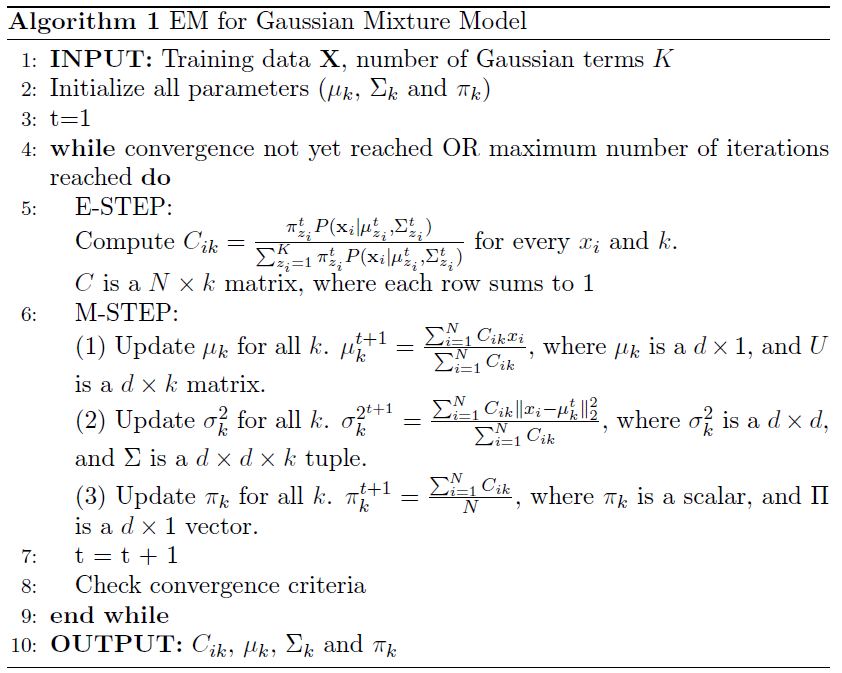

In [1]:
from IPython.display import Image
Image('figures/PseudoCode_EMforGMM.png',width=700)

## Alternating Optimization

* Does the EM algorithm find the **global minima**?

* Given a data set with an unknown number of groups/clusters, can you come up with a strategy for determining the "right" number of groups?

## Simulating Gaussian Mixture Models

**<font color=blue>Exercise:</font> In code, how would you draw a sample from a Gaussian Mixture Model? Or from a mixture model in general?**

* Note that in a Gaussian Mixture Model we are assuming that each data point $x_i$ was drawn from only one Gaussian. 

* Each data point $x_i$ has a *hard membership*.

* Each Gaussian in the Mixture Model will have its own $0 \leq \pi_k \leq 1$.

To simulate an event with arbitary probability $P_E$:

1. Generate a random number R that is equally likely to be between 0 and 1.

2. If $R \le P_E$, then in the simulation, the event occurs. Otherwise it does not occur.

In [ ]:
import numpy.random as npr

In [ ]:
?npr.uniform

In [ ]:
# Example simulation
Pe=0.13

num_sims=100_000
event_count=0
for sim in range(num_sims):
    
    # TO BE FINISHED IN CLASS
        
print('According to the simulation Pe =~', event_count/num_sims)

Let's consider the case where we have 4 Gaussian in the Mixture model with weights $[0.4,0.25,0.25,0.1]$:

In [ ]:
Pis = [.4, .25, .25, .1]

plt.bar(range(1,5), Pis)
plt.xticks(range(1,5),['$G_1$','$G_2$','$G_3$','$G_4$'])
plt.ylabel('Prior Probability \nfor each Gaussian component');

We need to first (randomly) select a Gaussian and then draw a point from it.

* How do you select from this set of Gaussians?

* We can sum up the $\pi$'s as we move from left to right and plot the running sums (or cumulative sum), then we can sample a Gaussian using a Uniform random number generator.

In [ ]:
plt.bar(range(1,5), np.cumsum(Pis))

plt.xticks(range(1,5),['$G_1$','$G_2$','$G_3$','$G_4$'])
plt.ylabel('Cumulative Probability');

Putting it all together:

In [ ]:
def make_GaussianMixture(N, Means, Sigs, Pis):
    X = np.empty((0,Means.shape[1]))
    L = np.empty(0)
    for i in range(N):
        rv = npr.uniform()   # sample uniform RV
        GaussianChosen = np.where(rv < np.cumsum(Pis))[0][0]
        L = np.append(L, GaussianChosen)
        X = np.append(X, np.array([npr.multivariate_normal(Means[GaussianChosen], 
                                                           np.eye(Means.shape[1])*Sigs[GaussianChosen])]), axis=0)
    return X, L

In [ ]:
N = 10_000
Means = np.array([[1,1],[0,0],[-.5, 1],[.5, 1.5]])
Sigs = [.1, .01, .05, .05]
Pis = [.4, .25, .25, .1]

X,L = make_GaussianMixture(N, Means, Sigs, Pis)

fig = plt.figure(figsize=(14,6))
fig.add_subplot(1,2,1)
plt.scatter(X[:,0],X[:,1], c=L)
plt.title('Synthetic Data with known Gaussians');
fig.add_subplot(1,2,2)
plt.scatter(X[:,0],X[:,1])
plt.title('Gaussian Mixture - as received from the world');

The picture on the left, represents the entire data color-coded according to a class they belong to.

In practice we are **not** given labels, and so we work directly with the unlabeled data set on the right.

* We can use GMM to uncover groups in the data.

## Example: GMM as Data Likelihood Estimation or Clustering

GMM is commonly used as an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

However, a common practical use for the GMM is as a clustering algorithm, where we are interested in finding groups in the data.

To illustrate this, I will use the ```scikit-learn``` algorithm implementation of the GMM model:

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
?GaussianMixture

In [ ]:
Nclusters = 5
GMM = GaussianMixture(n_components=Nclusters).fit(X)
labels = GMM.predict(X)
prob = GMM.predict_proba(X).round(2)

fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,Nclusters,1)
plt.scatter(X[:,0],X[:,1], c=L)
plt.title('True (Unknown) Labels');
fig.add_subplot(2,Nclusters,2)
plt.scatter(X[:,0],X[:,1])
plt.title('Gaussian Mixture');
fig.add_subplot(2,Nclusters,3)
plt.scatter(X[:,0],X[:,1], c=labels)
plt.title('Predicted Labels');
for i in range(Nclusters):
    ax = fig.add_subplot(2,Nclusters,Nclusters+i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=prob[:,i])
    fig.colorbar(p1, ax=ax)

## Example: GMM as Density Estimation

Consider some data generated from Scikit-Learn's ```make_moons``` function:

In [ ]:
from sklearn.datasets import make_moons
from matplotlib.patches import Ellipse

Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

Let's create a helper function that will help us visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output. 

* Let's not worry about the implementation of this helper function.

In [ ]:
# Code from "Python Data Science Handbook"
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

In [ ]:
GMM = GaussianMixture(n_components=2, covariance_type='full', random_state=0).fit(Xmoon)
plot_gmm(GMM, Xmoon)

But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data:

In [ ]:
GMM16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0).fit(Xmoon)
plot_gmm(GMM16, Xmoon, label=False)

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input. 

For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

In [ ]:
Xnew = GMM16.sample(100)
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1]);

GMM is convenient as a flexible means of modeling an arbitrary multi-dimensional distribution of data.